# Postgraduate Acceptancy

To be accepted in a graduate program may be taught, specially because the extreme number of daily applications, the low resources or schoolarships universities can provide, among others. How good would be to have a model that ennables us to know our possibilities of get into one of these programs, isn't? Well, that's what we are going to do this time. We'll create a Linear Regression model based on a dataset with information related to this obtained from Kagle to predict the get-into-probability according to some specific parameters.

This dataset is built by the following atributes:
- GRE score: This means to the score obtained in the GRE test (which is a general knowledge test)
- TOEFL score: This means to the score obtained in the TOEFL test (Standarized English test)
- University Raiting: It's your university raiting from 1 to 5
- SOP: It's a statement of purpouse raiting from 1 to 5
- LOR: It's recommendation letter raiting from 1 to 5
- GPA: It's your degree average score
- Research: A binary variable which indicates whether the student has performed research or not (1=Yes, 0=No)
- Chance of admit: Student's probability of acceptancy

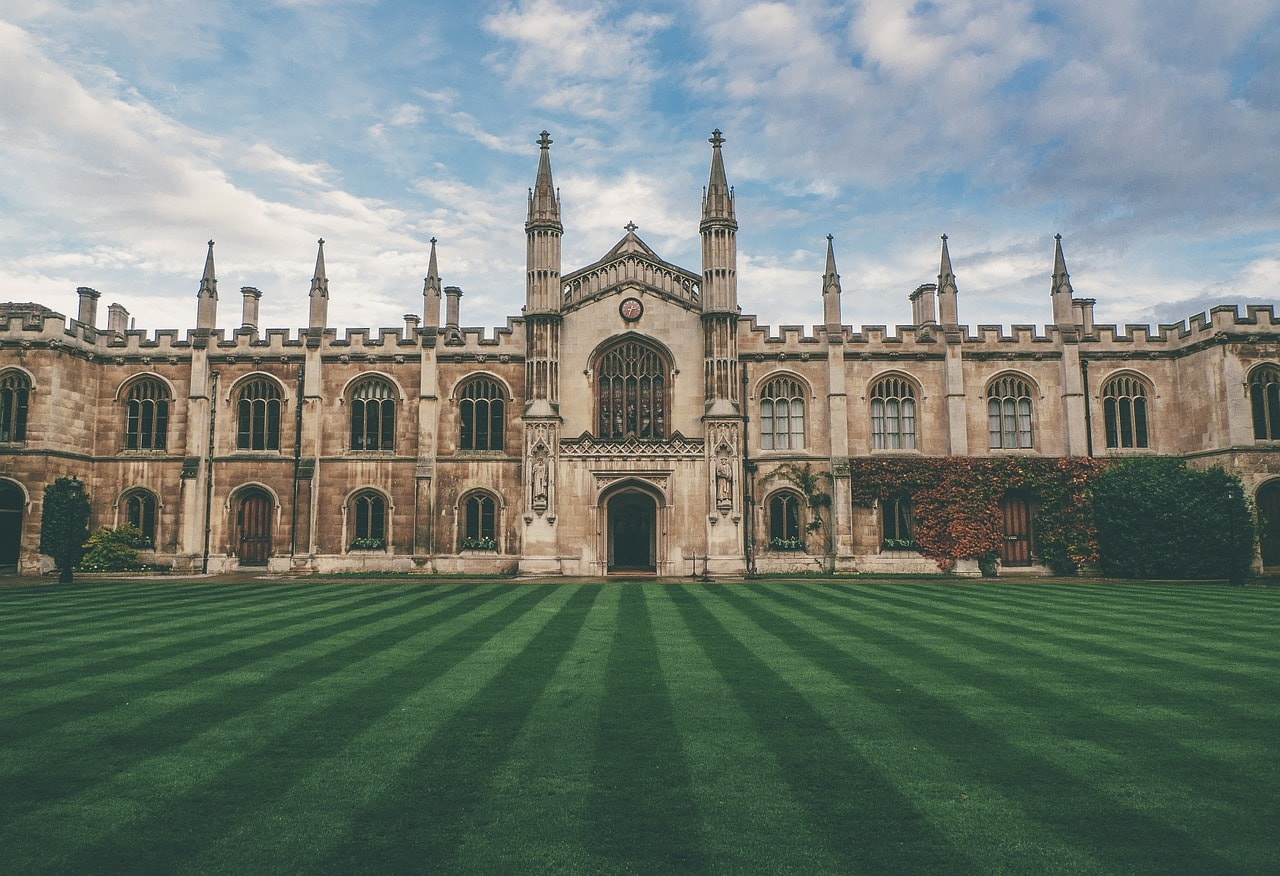

In [6]:
# First of all we import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Data Cleaning***
Here we deal with missing values, outliers, transformation of columns, or group the data by some specific variables to study its behavior easily or even being able to graph.

In [7]:
path = 'C:/Users/Roberto/Desktop/datasets/Admisión.csv'
data = pd.read_csv(path)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
data.columns.tolist()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit']

In [34]:
# First of all let's look for the presence of null values:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
# Now let's drop the column Serial No. since it plays the same role as the index
data = data.drop(['Serial No.'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## ***Exploratory Analysis***
In this part we do a brief exploration of the variables of the dataset to see the way they are related with the objective variable as well as how they relate each other (remind a high correlation among predictive variables impplies a poor efficiency of our model).

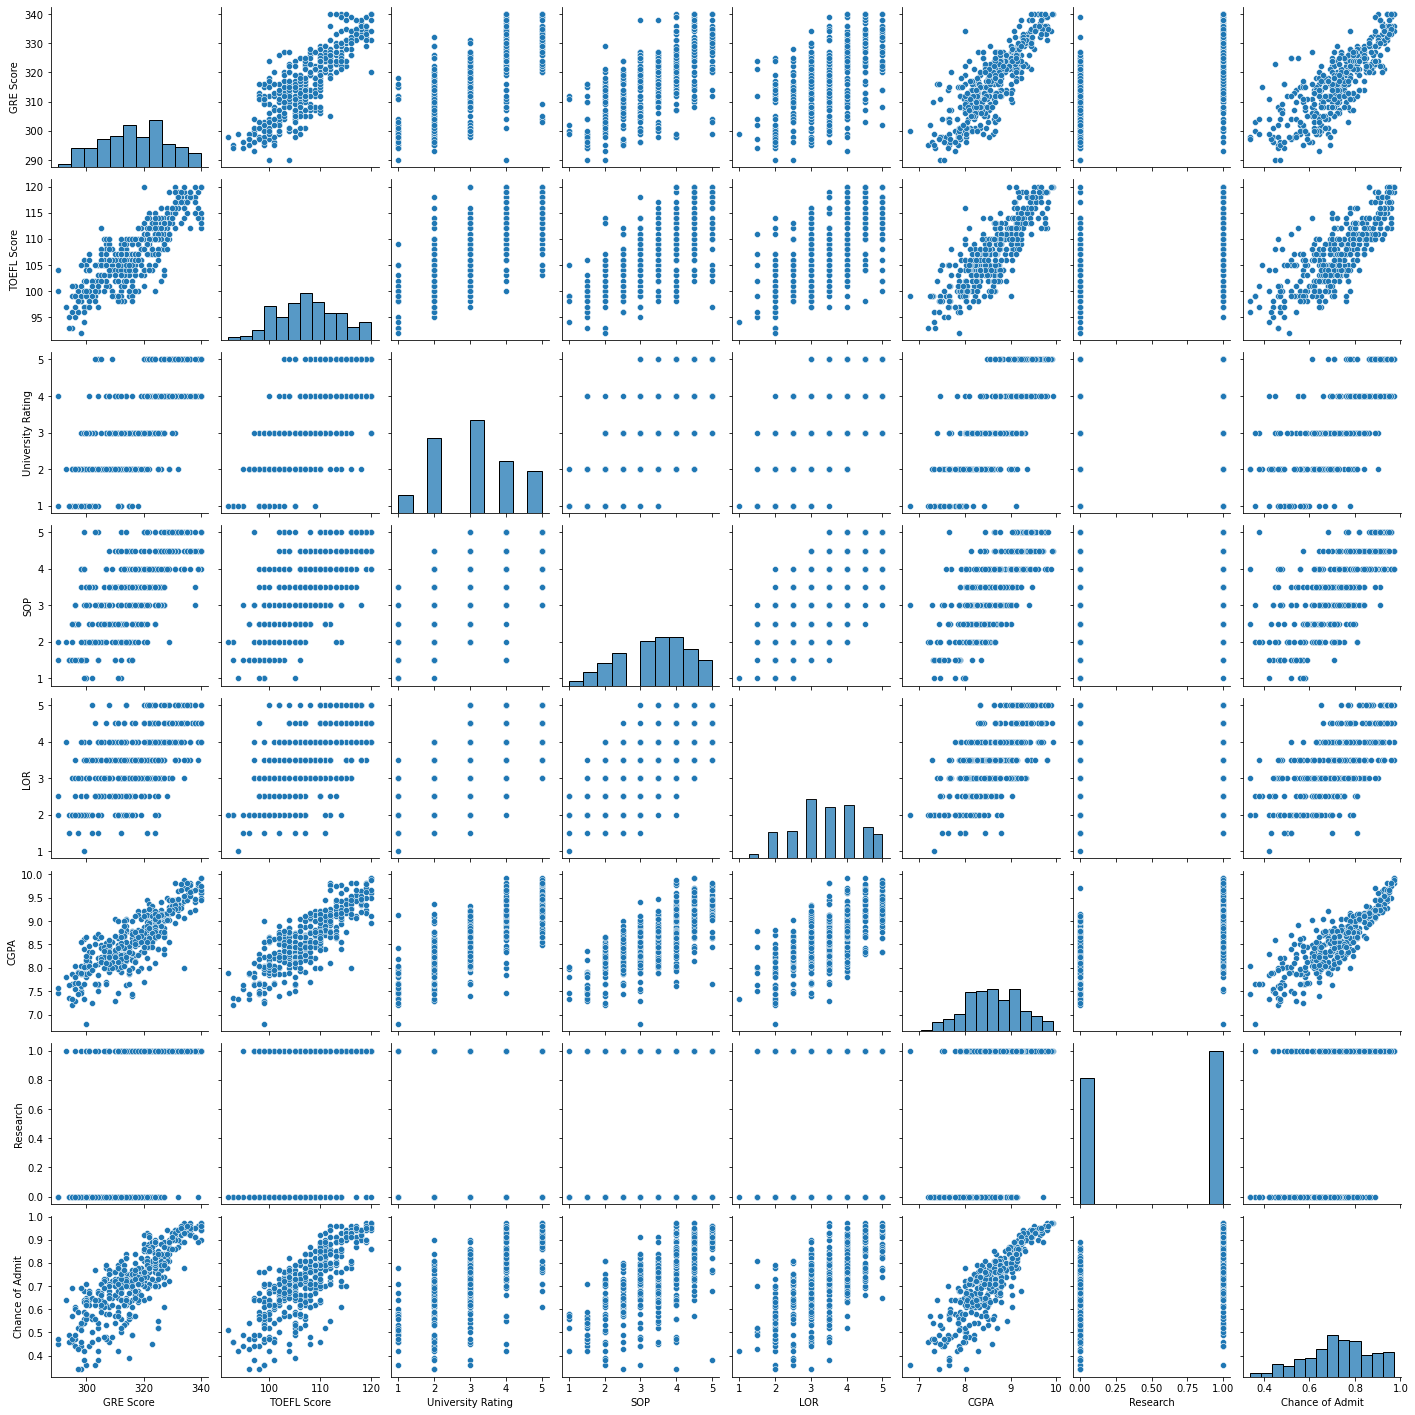

In [5]:
# Now our data is clean let's cheack which variables has the highest correlation with the probability of acceptancy:
sns.pairplot(data)
plt.show()

From previous graphs we can see the variables with highest correlation with "Chance of Admit" are: 
- GRE Score
- TOEFL Score
- GPA

And we can also realize that "GRE" and "TOEFL" scores have a high correlation each other, which may be a problem...

Let's confirm the previouslly said by doing a heat-correlation-map

<AxesSubplot:>

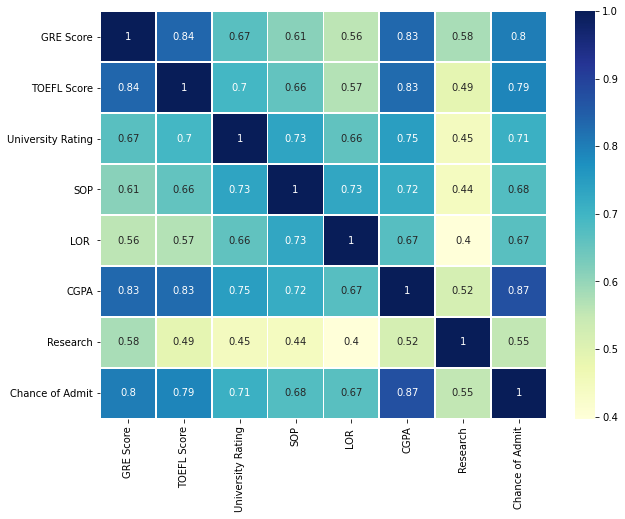

In [6]:
fig, axs=plt.subplots(figsize=(10,7.5))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,cmap="YlGnBu")
#plt.savefig('heatmap.png')

The heatmap provides a numerical confirmation to our previous suppositions (GRE and TOEFL scores are high correlated), and it enables us go further. Just by a little watching we realize about the high correlation between the GRE score and the GPA score which is even higher than the one between Chance of admit with any other variable. University Raiting is also problematic since it saves correlation with GPA, LOR and TOEFL score.

It seems all the variable save high correlation each other, hence, let's do a feature selection to be able of picking the most significant ones.

## ***Feature Selection***
In this stage we look for those variables with the highest sifnificance level to our model and we reject those that does not apport too much.

In [36]:
# Importing needed libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Defining the input and opuput variables
X = data.drop(['Chance of Admit'], axis=1)
Y = data['Chance of Admit']

In [38]:
n = 5 # number of singnificant variables we want our model has
model = LinearRegression()
rfe = RFE(model,n)
variables = rfe.fit(X,Y)

C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [39]:
variables_predictoras = X.columns.tolist()
z= list(zip(variables_predictoras,rfe.ranking_))
z

[('GRE Score', 3),
 ('TOEFL Score', 2),
 ('University Rating', 1),
 ('SOP', 1),
 ('LOR ', 1),
 ('CGPA', 1),
 ('Research', 1)]

Surpricilly TOEFL and GRE scores won't play in the model despite having a strong correlation with the predicted variable. This may be a consequence of the strong correlation these variables have with the rest.

Lets pick now just those ranked with 1 and drop the rest:

In [40]:
chosen_variables = [ z[i][0] for i in range(len(z)) if z[i][1] == 1 ]
chosen_variables

['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

Now we redefine the predictor variables:

In [41]:
X = X[chosen_variables]
X

,University Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0
...,...,...,...,...,...
395,3,3.5,3.5,9.04,1
396,3,3.0,3.5,9.11,1
397,4,5.0,4.5,9.45,1
398,3,3.5,4.0,8.78,0


**Spliting our data in training and testing sets**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# dividimos nuestros datos en conjunto de prueba y entrenamiento:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=89)

**Traning our model**

In [44]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

**Testing the model**

In [45]:
prediction = model.predict(X_test)

In [46]:
# Coeficientes del modelo
z = list(zip(chosen_variables,model.coef_))

# Now we compare our results with the real ones
error = sum((Y_test-prediction)**2)

# The R2 value:
R2 = model.score(X_test,Y_test)

# R2 adjusted
R2_adj = 1 - ( 1 - R2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print('-> The mean-square-error:',round(100*error,3),'%')
print()
print('-> El valor de R2 =',round(R2,3))
print()
print('-> El valor de R2 adjusted =',round(R2_adj,3))
print()
print('-> Los coeficientes son:')
z

-> The mean-square-error: 27.865 %

-> El valor de R2 = 0.828

-> El valor de R2 adjusted = 0.816

-> Los coeficientes son:


[('University Rating', 0.010433469209201083),
 ('SOP', -0.0018993984386791174),
 ('LOR ', 0.020246181325986313),
 ('CGPA', 0.1607409011942107),
 ('Research', 0.04094642140282792)]

#### la pendiente de la variable SOP no hace sentido que sea negativa, vamos a quitarla:

In [47]:
X = X.drop(['SOP'], axis=1)
X

,University Rating,LOR,CGPA,Research
0,4,4.5,9.65,1
1,4,4.5,8.87,1
2,3,3.5,8.00,1
3,3,2.5,8.67,1
4,2,3.0,8.21,0
...,...,...,...,...
395,3,3.5,9.04,1
396,3,3.5,9.11,1
397,4,4.5,9.45,1
398,3,4.0,8.78,0


In [48]:
# spliteamos los datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=89)

# Entrenamos a la bestia
model = LinearRegression()
model.fit(X_train,Y_train)

# Predecimos resultados
prediction = model.predict(X_test)

# Recalculamos los coeficientes y errores
error = sum((Y_test-prediction)**2)

# The R2 value:
R2 = model.score(X_test,Y_test)

# R2 adjusted
R2_adj = 1 - ( 1 - R2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print('-> The mean-square-error:',round(100*error,3),'%')
print()
print('-> El valor de R2 =',round(R2,3))
print()
print('-> El valor de R2 adjusted =',round(R2_adj,3))


-> The mean-square-error: 27.901 %

-> El valor de R2 = 0.827

-> El valor de R2 adjusted = 0.818


We can see the R2 adjusted rose up 0.02 points.

Just as a final prove, let's add the GRE and TOEFL scores and let's check this results:

In [65]:
# To do so we re-import the data
path = 'C:/Users/Roberto/Desktop/datasets/Admisión.csv'
data = pd.read_csv(path)

# specifying the dependient and independient variables
Y = data['Chance of Admit']
X = data.drop(['Serial No.','SOP','Chance of Admit'], axis=1)
X

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.5,8.87,1
2,316,104,3,3.5,8.00,1
3,322,110,3,2.5,8.67,1
4,314,103,2,3.0,8.21,0
...,...,...,...,...,...,...
395,324,110,3,3.5,9.04,1
396,325,107,3,3.5,9.11,1
397,330,116,4,4.5,9.45,1
398,312,103,3,4.0,8.78,0


In [66]:
# dividimos nuestros datos en conjunto de prueba y entrenamiento:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=89)

# Training the model
model = LinearRegression()
model.fit(X_train,Y_train)

# Doing the prediction
prediction = model.predict(X_test)

# Recalculamos los coeficientes y errores
error = sum((Y_test-prediction)**2)

# The R2 value:
R2 = model.score(X_test,Y_test)

# R2 adjusted
R2_adj = 1 - ( 1 - R2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print('-> The mean-square-error:',round(100*error,3),'%')
print()
print('-> El valor de R2 =',round(R2,3))
print()
print('-> El valor de R2 adjusted =',round(R2_adj,3))

-> The mean-square-error: 25.784 %

-> El valor de R2 = 0.841

-> El valor de R2 adjusted = 0.827


The result is amazing, 
- the mean-square-error has been reduced when adding this two variables from 27.9% to 25.8%
- Both the R2 and the R2 adjusted has increased from 0.827 and 0.818 to 0.841 and 0.827 respectively.

In [67]:
# Now let's see what my probabilies are:
my_features = np.array([300,78,3,4.5,9.2,0]).reshape(1,-1)
my_prediction = model.predict(my_features)
print('My probabilities to be accepted are',round(100*my_prediction[0],3),'%')

My probabilities to be accepted are 68.256 %


### What could happen if we use all of the dataset variables?
Let's see...

In [68]:
# To do so we re-import the data
path = 'C:/Users/Roberto/Desktop/datasets/Admisión.csv'
data = pd.read_csv(path)

# specifying the dependient and independient variables
Y = data['Chance of Admit']
X = data.drop(['Serial No.','Chance of Admit'], axis=1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [69]:
# dividimos nuestros datos en conjunto de prueba y entrenamiento:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=89)

# Training the model
model = LinearRegression()
model.fit(X_train,Y_train)

# Doing the prediction
prediction = model.predict(X_test)

# Recalculamos los coeficientes y errores
error = sum((Y_test-prediction)**2)

# The R2 value:
R2 = model.score(X_test,Y_test)

# R2 adjusted
R2_adj = 1 - ( 1 - R2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print('-> The mean-square-error:',round(100*error,3),'%')
print()
print('-> El valor de R2 =',round(R2,3))
print()
print('-> El valor de R2 adjusted =',round(R2_adj,3))

-> The mean-square-error: 25.736 %

-> El valor de R2 = 0.841

-> El valor de R2 adjusted = 0.825


The result is evident, the fact of adding the variable "SOP" get our model worse and this can be appreciated because the value of R2 adjusted decreased from 0.827 to 0.825.

In [79]:
my_features = np.array([300,78,3,4.5,4.5,9.2,0]).reshape(1,-1)
my_prediction = model.predict(my_features)
print('My probabilities to be accepted are',round(100*my_prediction[0],3),'%')

My probabilities to be accepted are 67.84 %
